# Lab 4: Root finding (1)

The first serious problem we will tackle is root finding. In this lab we'll implement two very simple algorithms, called the *bisection algorithm* and *regula falsi* ("false position") methods. For notes on the algorithms themselves, consult this week's cheat sheet or the lecture slides on QM+.  There are also links to the module texts that can serves for references for the methods.

Listed below are some code fragments to get started with in writing code to find roots.  There are several different root finding methods we will explore.  Each methods has different strengths and weakness and can fail in different ways.  A deliberate part of this exercise is understanding these strengths and weaknesses so that the algorithms can be used effectively.

A reminder that **you should follow bold instructions**, evaluate cells containing code unless otherwise instructed, and be ready to discuss your work at the checkpoints (&#9654;).

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    Albion Alushani
* SID:     190266837

## The bisection algorithm

Recall that this takes as input a function $f$ and range $(l, u)$ such that $f(l)$ and $f(u)$ have opposite signs. We *bisect* the range – that is, find the middle, $m$ – and depending on the sign of $f(m)$, locate the root in either the lower half $(l, m)$ or upper half $(m, u)$ of the original range:

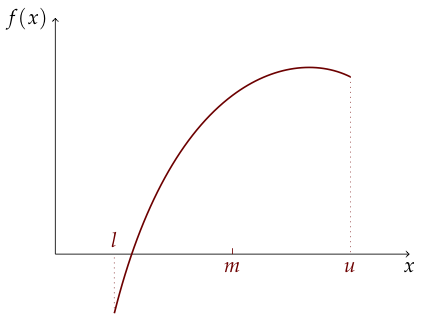

Let's write a function to perform one step of this algorithm. **Complete the half-written code for this function below.**

In [1]:
def bisection_step(f,bounds):
    """Performs one step of the bisection algorithm to locate a root of f,
    and returns a smaller range in which the root is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""

    lower, upper = bounds      # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint

    if (f(lower)*f(middle)<0): # We want this code to run if f(l) and f(m) have opposite signs. Fill in the condition here
        return (lower, middle)
    else:
        return (middle,upper) # Fill in an appropriate return value here if the condition is false
    

In order to test this out, we'll need a suitable test function. Let's try a really simple one where we know the answer: $f(x) = x^2 - 4$, which of course has roots at $x = \pm2$:

In [2]:
def f(x):
    return x**2 - 4

bisection_step(f, (3,4))

(3.5, 4)

The first step in root finding is always getting a sense of the function and knowing roughly where roots, and any pathological aspects of the function (e.g., discontinuities, asymptotes) are.  To get started **Plot this function in the range $(0,5)$.**

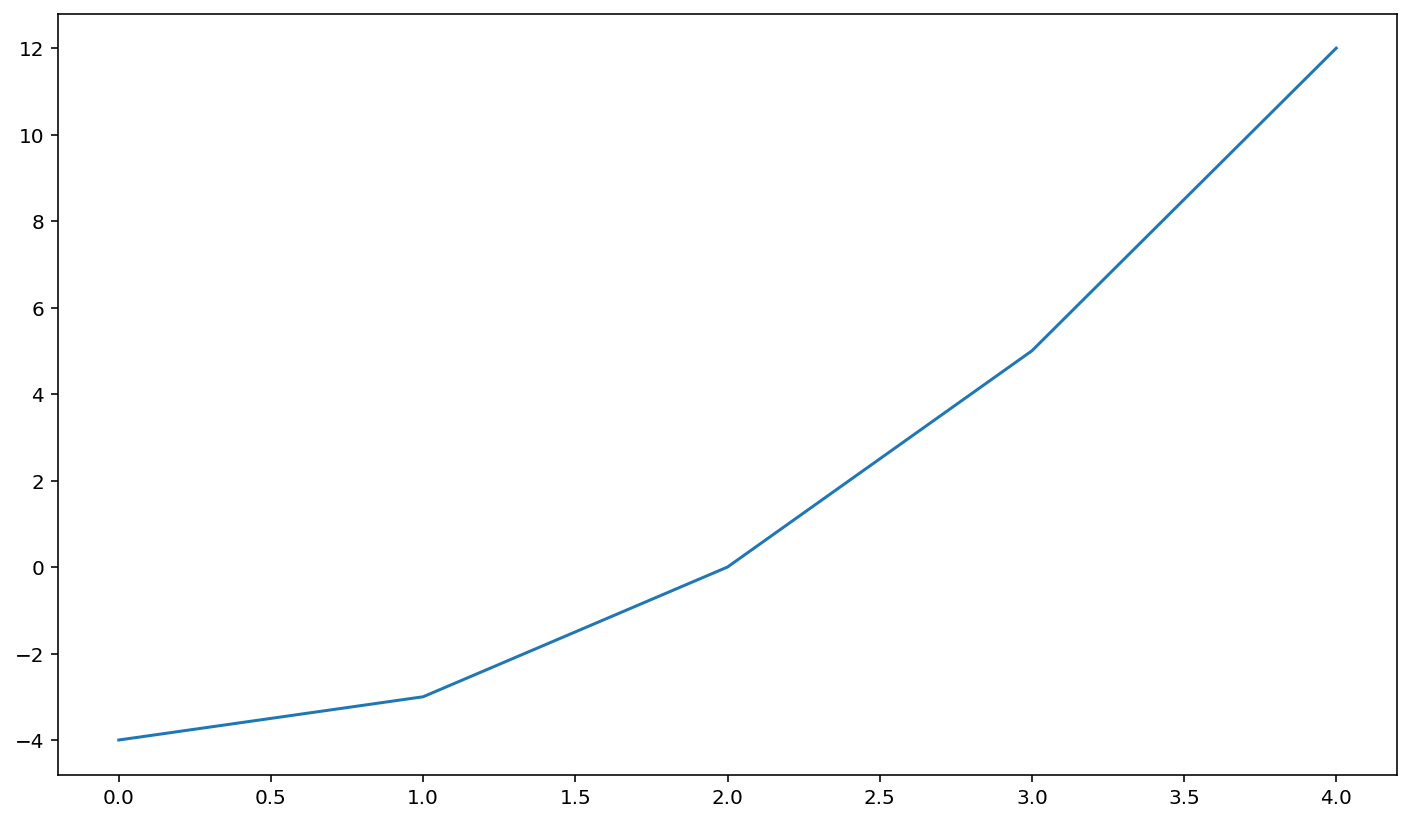

In [3]:
from matplotlib.pyplot import figure,plot

x = [0,1,2,3,4]
y = []
for i in range(0,5):
    y.append(f(i))

plot(x,y)


**Insert an appropriate loop command** in the code below to perform 20 steps of this algorithm on our newly defined $f(x)$, starting from the range $(0,5)$ and printing out the new range at each step.

In [4]:
# Print column titles (the "^" makes them centred; try "<" or ">"!)
# This is an example of using a format string: see the extension to Lab 2.
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))
step = 0
l, u = 0, 5 # Starting range
while step!=20:       # Put in an appropriate loop here
    # The crucial step: check you understand how this works!
    l, u = bisection_step(f, (l, u)) 
    step+=1
    # This format string prints out three values, each with width 15 characters and 12 decimal places
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 

     lower            upper         difference   
 0.000000000000   2.500000000000   2.500000000000
 1.250000000000   2.500000000000   1.250000000000
 1.875000000000   2.500000000000   0.625000000000
 1.875000000000   2.187500000000   0.312500000000
 1.875000000000   2.031250000000   0.156250000000
 1.953125000000   2.031250000000   0.078125000000
 1.992187500000   2.031250000000   0.039062500000
 1.992187500000   2.011718750000   0.019531250000
 1.992187500000   2.001953125000   0.009765625000
 1.997070312500   2.001953125000   0.004882812500
 1.999511718750   2.001953125000   0.002441406250
 1.999511718750   2.000732421875   0.001220703125
 1.999511718750   2.000122070312   0.000610351562
 1.999816894531   2.000122070312   0.000305175781
 1.999969482422   2.000122070312   0.000152587891
 1.999969482422   2.000045776367   0.000076293945
 1.999969482422   2.000007629395   0.000038146973
 1.999988555908   2.000007629395   0.000019073486
 1.999998092651   2.000007629395   0.000009536743


**Does the width of the range change as expected at each step? Does the algorithm converge to the known root?**

**Now write another loop along the same lines, but this time stopping only when the range is smaller than a set tolerance (say $10^{-8}$). How many iterations does this take, starting from $(0, 5)$?  Is this the number of iterations that you would predict from the algorithm?**

In [5]:
import numpy as np
#from numpy import abs

print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))
l, u = 0, 5
tolerance = 1e-8 
condition = True
while condition:       
    l, u = bisection_step(f, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    if np.abs((u-l))<=tolerance:
        condition = False

     


     lower            upper         difference   
 0.000000000000   2.500000000000   2.500000000000
 1.250000000000   2.500000000000   1.250000000000
 1.875000000000   2.500000000000   0.625000000000
 1.875000000000   2.187500000000   0.312500000000
 1.875000000000   2.031250000000   0.156250000000
 1.953125000000   2.031250000000   0.078125000000
 1.992187500000   2.031250000000   0.039062500000
 1.992187500000   2.011718750000   0.019531250000
 1.992187500000   2.001953125000   0.009765625000
 1.997070312500   2.001953125000   0.004882812500
 1.999511718750   2.001953125000   0.002441406250
 1.999511718750   2.000732421875   0.001220703125
 1.999511718750   2.000122070312   0.000610351562
 1.999816894531   2.000122070312   0.000305175781
 1.999969482422   2.000122070312   0.000152587891
 1.999969482422   2.000045776367   0.000076293945
 1.999969482422   2.000007629395   0.000038146973
 1.999988555908   2.000007629395   0.000019073486
 1.999998092651   2.000007629395   0.000009536743


&#9654; **CHECKPOINT 1**

## *Regula falsi*

This algorithm is very similar but tries to make a more sensible guess at the root than simply the midpoint of the range. Instead, we calculate the intersection point of a straight line through $(l, f(l))$ and $(u, f(u))$, which turns out to be
$$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}:
$$

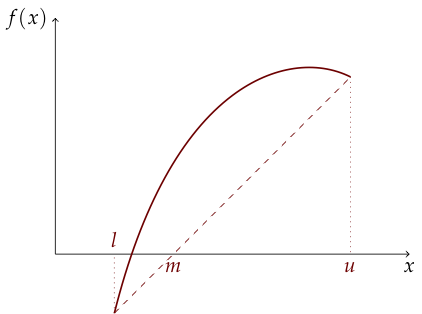

**In the same way as above, write a function to perform one step of this algorithm.**

In [6]:
"""Performs one step of the regula falsi algorithm to locate a root of f,
    and returns a smaller range in which the root is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""


def regula_falsi_step(f, bounds):
   
    lower, upper = bounds
    intersection = ((lower*f(upper))-(upper*f(lower)))/(f(upper)-f(lower))
    
    if f(lower)*f(intersection)<0:
        return (lower,intersection)
    else:
        return (upper,intersection)

def f(x):
    return (x**2)-4



Unlike the bisection algorithm, the size of the range in *regula falsi* is not guaranteed to converge to zero. So to test whether the calculation is complete, we should check whether we've found a root by checking the value of $f$ at both endpoints.

**Write a loop using *regula falsi* that repeats until $|f(l)|$ or $|f(u)|$ is less than $10^{-8}$. How many iterations are needed to solve $x^2 - 4 = 0$ starting from the range $(0, 5)$? Is *regula falsi* more efficient than the bisection rule in this case?**

In [10]:
import numpy as np
from numpy import abs

l,u = 0,5
tolerance = 1e-8
condition = True
iteration = 0 
while condition:
    l, u = regula_falsi_step(f, (l, u)) 
    iteration += 1
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    print("iterations: " , iteration)
    print("  ")
    if np.abs((f(u)))<tolerance: #or np.abs((f(l)))<tolerance:
        condition = False
    

 5.000000000000   0.800000000000  -4.200000000000
iterations:  1
  
 5.000000000000   1.379310344828  -3.620689655172
iterations:  2
  
 5.000000000000   1.708108108108  -3.291891891892
iterations:  3
  
 5.000000000000   1.869460112812  -3.130539887188
iterations:  4
  
 5.000000000000   1.942991202346  -3.057008797654
iterations:  5
  
 5.000000000000   1.975367044552  -3.024632955448
iterations:  6
  
 5.000000000000   1.989405737953  -3.010594262047
iterations:  7
  
 5.000000000000   1.995452719826  -3.004547280174
iterations:  8
  
 5.000000000000   1.998049898832  -3.001950101168
iterations:  9
  
 5.000000000000   1.999164009461  -3.000835990539
iterations:  10
  
 5.000000000000   1.999641675547  -3.000358324453
iterations:  11
  
 5.000000000000   1.999846424516  -3.000153575484
iterations:  12
  
 5.000000000000   1.999934180491  -3.000065819509
iterations:  13
  
 5.000000000000   1.999971791374  -3.000028208626
iterations:  14
  
 5.000000000000   1.999987910540  -3.000012

▶ **CHECKPOINT 2**

**Now explore the behaviour of each of these two methods for finding roots.** You might like to consider the following questions:

- Which functions can they be applied to? 
- Can you predict how many iterations they will require? 
- Is it possible that they will not converge? 
- Is it possible that they will converge to a value that is not a root?
- Is it possible that there is a root within the initial range that they do not find?

To help your exploration, you might like to look at the following functions, although you should of course also try others that you invent yourself:
- $g(x) = x^8 - 2x - 1$
- $h(x) = \dfrac{x-1}{x-2}$
- $j(x) = x^3 + 47x^2 - 148x + 90$
- $k(x) = x^4 - 8x^3 + 22x^2 - 24x + 9$

You may want to plot these functions to see where the root are roughly and help you answer the questions.

In [25]:
import numpy as np
from matplotlib.pyplot import figure,plot

def g(x):
    return (x**8)-(2*x)-1

def h(x):
    return (x-1)/(x-2)

def j(x):
    return (x**3)+(47*(x**2))-(148*x)+90

def k(x):
    return (x**4)-(8*(x**3))+(22*(x**2))-(24*x)+9


print("g(x): Bisection Step ")
l, u = 0, 5
tolerance = 1e-8 
condition = True
while condition:       
    l, u = bisection_step(g, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    if np.abs((u-l))<=tolerance:
        condition = False
print('\n')

print("h(x): Bisection Step ")
l, u = 0.5, 2
tolerance = 1e-8 
condition = True
while condition:       
    l, u = bisection_step(h, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    if np.abs((u-l))<=tolerance:
        condition = False
print('\n')

print("j(x): Bisection Step ")
l, u = 0.8, 2.2
tolerance = 1e-8 
condition = True
while condition:       
    l, u = bisection_step(j, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    if np.abs((u-l))<=tolerance:
        condition = False
print('\n')

print("k(x): Bisection Step ")
l, u = 0.8, 2.2
tolerance = 1e-8 
condition = True
while condition:       
    l, u = bisection_step(k, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    if np.abs((u-l))<=tolerance:
        condition = False
print('\n')

print("g(x): Regula Falsi Step ")
l,u = 0,5
tolerance = 1e-8
condition = True
iteration = 0 
while condition:
    l, u = regula_falsi_step(g, (l, u)) 
    iteration += 1
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    print("iterations: " , iteration)
    print("  ")
    if np.abs((g(u)))<tolerance:
        condition = False
        
print("h(x): Regula Falsi Step ")
l,u = 0.8,2.1
tolerance = 1e-8
condition = True
iteration = 0 
while condition:
    l, u = regula_falsi_step(h, (l, u)) 
    iteration += 1
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    print("iterations: " , iteration)
    print("  ")
    if np.abs((h(u)))<tolerance:
        condition = False
        
print("j(x): Regula Falsi Step ")
l,u = 0.8,2.1
tolerance = 1e-8
condition = True
iteration = 0 
while condition:
    l, u = regula_falsi_step(j, (l, u)) 
    iteration += 1
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    print("iterations: " , iteration)
    print("  ")
    if np.abs((j(u)))<tolerance:
        condition = False

print("k(x): Regula Falsi Step ")
l,u = 0.8,2.1
tolerance = 1e-8
condition = True
iteration = 0 
while condition:
    l, u = regula_falsi_step(k, (l, u)) 
    iteration += 1
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
    print("iterations: " , iteration)
    print("  ")
    if np.abs((k(u)))<tolerance:
        condition = False


g(x): Bisection Step 
 0.000000000000   2.500000000000   2.500000000000
 0.000000000000   1.250000000000   1.250000000000
 0.625000000000   1.250000000000   0.625000000000
 0.937500000000   1.250000000000   0.312500000000
 1.093750000000   1.250000000000   0.156250000000
 1.093750000000   1.171875000000   0.078125000000
 1.132812500000   1.171875000000   0.039062500000
 1.152343750000   1.171875000000   0.019531250000
 1.152343750000   1.162109375000   0.009765625000
 1.157226562500   1.162109375000   0.004882812500
 1.159667968750   1.162109375000   0.002441406250
 1.160888671875   1.162109375000   0.001220703125
 1.161499023438   1.162109375000   0.000610351562
 1.161804199219   1.162109375000   0.000305175781
 1.161956787109   1.162109375000   0.000152587891
 1.161956787109   1.162033081055   0.000076293945
 1.161994934082   1.162033081055   0.000038146973
 1.161994934082   1.162014007568   0.000019073486
 1.161994934082   1.162004470825   0.000009536743
 1.161999702454   1.16200447

iterations:  442
  
 5.000000000000   0.005699492898  -4.994300507102
iterations:  443
  
 5.000000000000   0.005712424379  -4.994287575621
iterations:  444
  
 5.000000000000   0.005725356157  -4.994274643843
iterations:  445
  
 5.000000000000   0.005738288232  -4.994261711768
iterations:  446
  
 5.000000000000   0.005751220604  -4.994248779396
iterations:  447
  
 5.000000000000   0.005764153274  -4.994235846726
iterations:  448
  
 5.000000000000   0.005777086240  -4.994222913760
iterations:  449
  
 5.000000000000   0.005790019504  -4.994209980496
iterations:  450
  
 5.000000000000   0.005802953065  -4.994197046935
iterations:  451
  
 5.000000000000   0.005815886924  -4.994184113076
iterations:  452
  
 5.000000000000   0.005828821079  -4.994171178921
iterations:  453
  
 5.000000000000   0.005841755532  -4.994158244468
iterations:  454
  
 5.000000000000   0.005854690282  -4.994145309718
iterations:  455
  
 5.000000000000   0.005867625329  -4.994132374671
iterations:  456
  


296059
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296060
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296061
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296062
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296063
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296064
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296065
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296066
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296067
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296068
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296069
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296070
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296071
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296072
  
 5.000000000000   1.162004394337  -3.8379

 296559
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296560
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296561
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296562
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296563
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296564
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296565
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296566
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296567
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296568
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296569
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296570
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296571
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  296572
  
 5.000000000000   1.162004394337  -3.837

  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297051
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297052
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297053
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297054
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297055
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297056
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297057
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297058
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297059
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297060
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297061
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297062
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297063
  
 5.000000000000   1.162004394337  -3.83799560566

iterations:  297494
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297495
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297496
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297497
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297498
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297499
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297500
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297501
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297502
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297503
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297504
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297505
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297506
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297507
  
 5.000000000000   1.16200439

 5.000000000000   1.162004394337  -3.837995605663
iterations:  297934
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297935
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297936
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297937
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297938
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297939
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297940
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297941
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297942
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297943
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297944
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297945
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  297946
  
 5.000000000000   1.162004394337  -3.837995605663
i

  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298409
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298410
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298411
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298412
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298413
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298414
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298415
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298416
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298417
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298418
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298419
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298420
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298421
  
 5.000000000000   1.162004394337  -3.83799560566


 5.000000000000   1.162004394337  -3.837995605663
iterations:  298894
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298895
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298896
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298897
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298898
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298899
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298900
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298901
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298902
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298903
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298904
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298905
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  298906
  
 5.000000000000   1.162004394337  -3.837995605663


iterations:  299238
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299239
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299240
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299241
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299242
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299243
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299244
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299245
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299246
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299247
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299248
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299249
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299250
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299251
  
 5.000000000000   1.16200439

299683
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299684
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299685
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299686
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299687
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299688
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299689
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299690
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299691
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299692
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299693
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299694
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299695
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  299696
  
 5.000000000000   1.162004394337  -3.8379

 300183
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300184
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300185
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300186
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300187
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300188
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300189
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300190
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300191
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300192
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300193
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300194
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300195
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300196
  
 5.000000000000   1.162004394337  -3.837

 5.000000000000   1.162004394337  -3.837995605663
iterations:  300672
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300673
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300674
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300675
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300676
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300677
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300678
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300679
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300680
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300681
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300682
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300683
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  300684
  
 5.000000000000   1.162004394337  -3.837995605663
i

301110
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301111
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301112
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301113
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301114
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301115
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301116
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301117
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301118
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301119
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301120
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301121
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301122
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301123
  
 5.000000000000   1.162004394337  -3.8379

301618
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301619
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301620
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301621
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301622
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301623
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301624
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301625
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301626
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301627
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301628
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301629
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301630
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  301631
  
 5.000000000000   1.162004394337  -3.8379

 5.000000000000   1.162004394337  -3.837995605663
iterations:  302037
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302038
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302039
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302040
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302041
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302042
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302043
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302044
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302045
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302046
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302047
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302048
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302049
  
 5.000000000000   1.162004394337  -3.837995605663
i

 5.000000000000   1.162004394337  -3.837995605663
iterations:  302517
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302518
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302519
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302520
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302521
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302522
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302523
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302524
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302525
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302526
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302527
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302528
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302529
  
 5.000000000000   1.162004394337  -3.837995605663
i


  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302933
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302934
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302935
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302936
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302937
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302938
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302939
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302940
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302941
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302942
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302943
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302944
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  302945
  
 5.000000000000   1.162004394337  -3.8379956056

303432
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303433
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303434
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303435
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303436
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303437
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303438
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303439
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303440
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303441
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303442
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303443
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303444
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303445
  
 5.000000000000   1.162004394337  -3.8379

 303932
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303933
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303934
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303935
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303936
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303937
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303938
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303939
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303940
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303941
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303942
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303943
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303944
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  303945
  
 5.000000000000   1.162004394337  -3.837

  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304409
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304410
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304411
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304412
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304413
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304414
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304415
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304416
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304417
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304418
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304419
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304420
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304421
  
 5.000000000000   1.162004394337  -3.83799560566

iterations:  304813
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304814
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304815
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304816
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304817
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304818
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304819
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304820
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304821
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304822
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304823
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304824
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304825
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  304826
  
 5.000000000000   1.16200439

iterations:  305329
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305330
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305331
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305332
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305333
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305334
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305335
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305336
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305337
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305338
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305339
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305340
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305341
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305342
  
 5.000000000000   1.16200439


 5.000000000000   1.162004394337  -3.837995605663
iterations:  305770
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305771
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305772
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305773
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305774
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305775
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305776
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305777
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305778
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305779
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305780
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305781
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  305782
  
 5.000000000000   1.162004394337  -3.837995605663


 5.000000000000   1.162004394337  -3.837995605663
iterations:  306222
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306223
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306224
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306225
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306226
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306227
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306228
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306229
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306230
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306231
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306232
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306233
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306234
  
 5.000000000000   1.162004394337  -3.837995605663
i

 306712
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306713
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306714
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306715
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306716
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306717
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306718
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306719
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306720
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306721
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306722
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306723
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306724
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  306725
  
 5.000000000000   1.162004394337  -3.837

307181
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307182
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307183
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307184
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307185
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307186
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307187
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307188
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307189
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307190
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307191
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307192
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307193
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307194
  
 5.000000000000   1.162004394337  -3.8379

iterations:  307727
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307728
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307729
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307730
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307731
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307732
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307733
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307734
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307735
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307736
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307737
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307738
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307739
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  307740
  
 5.000000000000   1.16200439

 5.000000000000   1.162004394337  -3.837995605663
iterations:  308214
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308215
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308216
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308217
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308218
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308219
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308220
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308221
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308222
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308223
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308224
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308225
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308226
  
 5.000000000000   1.162004394337  -3.837995605663
i

 5.000000000000   1.162004394337  -3.837995605663
iterations:  308674
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308675
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308676
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308677
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308678
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308679
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308680
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308681
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308682
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308683
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308684
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308685
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  308686
  
 5.000000000000   1.162004394337  -3.837995605663
i

iterations:  309126
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309127
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309128
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309129
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309130
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309131
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309132
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309133
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309134
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309135
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309136
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309137
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309138
  
 5.000000000000   1.162004394337  -3.837995605663
iterations:  309139
  
 5.000000000000   1.16200439

▶ **CHECKPOINT 3**

## Extension

You will have seen in your exploration that the bisection and *regula falsi* algorithms are complementary: they work well in different ways and in different situations. **Invent a hybrid method that implements an appropriate combination of these steps.** Can you find an algorithm that is better (say, converges faster) than either the bisection or *regula falsi* methods individually?